# l1和l2正则化

In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data=load_breast_cancer()
X=data.data
y=data.target

In [4]:
X.shape

(569, 30)

In [5]:
lrl1=LR(penalty='l1',solver='liblinear',C=0.5,max_iter=1000)
lrl2=LR(penalty='l2',solver='liblinear',C=0.5,max_iter=1000)

In [6]:
#逻辑回归的重要属性coef_，查看每个特征对应的参数
lrl1=lrl1.fit(X,y)


In [7]:
lrl1.coef_

array([[ 3.99615477,  0.03164715, -0.13635607, -0.01622717,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50346534,  0.        , -0.07124818,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24555102, -0.12861141, -0.01440856,  0.        ,
         0.        , -2.04661436,  0.        ,  0.        ,  0.        ]])

In [8]:
(lrl1.coef_!=0).sum(axis=1)#不为零系数个数

array([10])

In [9]:
lrl2=lrl2.fit(X,y)
lrl2.coef_

array([[ 1.61543234e+00,  1.02284415e-01,  4.78483684e-02,
        -4.43927107e-03, -9.42247882e-02, -3.01420673e-01,
        -4.56065677e-01, -2.22346063e-01, -1.35660484e-01,
        -1.93917198e-02,  1.61646580e-02,  8.84531037e-01,
         1.20301273e-01, -9.47422278e-02, -9.81687769e-03,
        -2.37399092e-02, -5.71846204e-02, -2.70190106e-02,
        -2.77563737e-02,  1.98122260e-04,  1.26394730e+00,
        -3.01762592e-01, -1.72784162e-01, -2.21786411e-02,
        -1.73339657e-01, -8.79070550e-01, -1.16325561e+00,
        -4.27661014e-01, -4.20612369e-01, -8.69820058e-02]])

In [10]:
lrl2.coef_!=0


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]])

In [11]:
np.linspace(0.1,1,19)

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

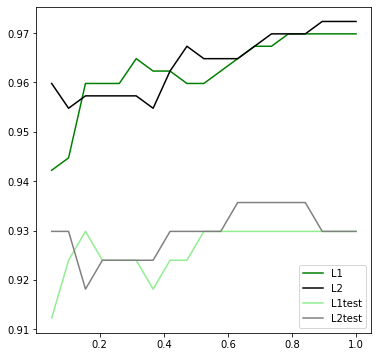

In [14]:
l1=[]
l2=[]
l1test=[]
l2test=[]
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.linspace(0.05,1,19):
    lrl1=LR(penalty='l1',solver='liblinear',C=i,max_iter=1000)
    lrl2=LR(penalty='l2',solver='liblinear',C=i,max_iter=1000)
    
    lrl1=lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    
    lrl2=lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

    
graph=[l1,l2,l1test,l2test]#Y值
color=['green','black','lightgreen','gray']
label=['L1','L2','L1test','L2test']
    
plt.figure(figsize=(6,6))   
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4)#图例的位置在哪里，4表示右下角
plt.show()

In [15]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# 高效的潜入法 embedded

In [16]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

data=load_breast_cancer()

In [17]:
data.data.shape

(569, 30)

In [25]:
LR_=LR(solver='liblinear',C=0.8,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()#交叉验证

0.9508998790078644

In [26]:
X_embedded=SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)#降维，norm_order为范式，=1
X_embedded.shape

(569, 9)

In [27]:
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9368323826808401

# 调节拟合效果的方法：两种

## (1)调节SelectFromModel的参数threshold

In [30]:
abs(LR_.fit(data.data,data.target).coef_).max()#abs()取绝对值

1.9407192479360273

(0.0, 30)
(0.1021431183124225, 17)
(0.204286236624845, 12)
(0.3064293549372675, 10)
(0.40857247324969, 8)
(0.5107155915621124, 8)
(0.612858709874535, 5)
(0.7150018281869575, 5)
(0.81714494649938, 5)
(0.9192880648118025, 5)
(1.0214311831242249, 5)
(1.1235743014366475, 4)
(1.22571741974907, 3)
(1.3278605380614925, 2)
(1.430003656373915, 2)
(1.5321467746863375, 1)
(1.63428989299876, 1)
(1.7364330113111823, 1)
(1.838576129623605, 1)
(1.9407192479360273, 1)


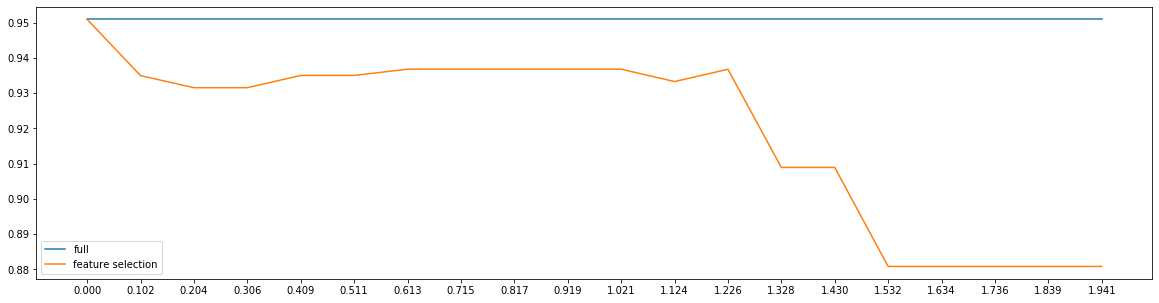

In [29]:
fullx=[]
fsx=[]

threshold=np.linspace(0,abs(LR_.fit(data.data,data.target).coef_).max(),20)

k=0
for i in threshold:
    X_embedded=SelectFromModel(LR_,threshold=i,norm_order=1).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean())
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=5).mean())#特征选择后的交叉验证
    print((threshold[k],X_embedded.shape[1]))#降维后特征个数
    k+=1
    
plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label='full')
plt.plot(threshold,fsx,label='feature selection')
plt.xticks(threshold)
plt.legend()
plt.show()

## (2)调逻辑回归的LR_,通过画C的学习曲线来实现

0.9563164376458386 7.01


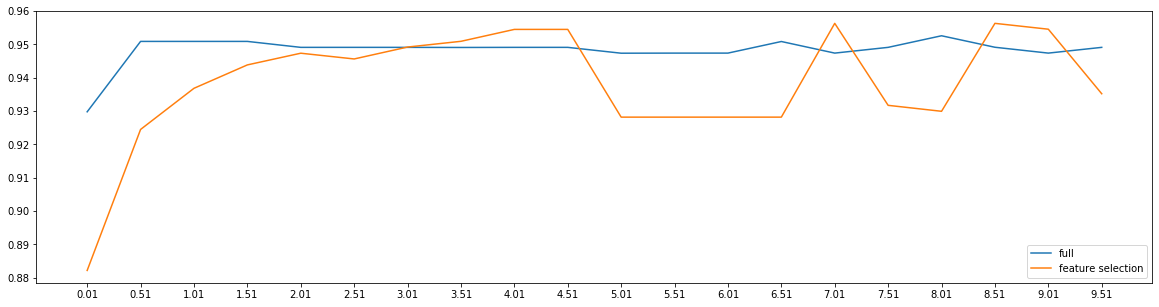

In [31]:
fullx=[]
fsx=[]

C=np.arange(0.01,10.01,0.5)
for i in C:
    LR_=LR(solver='liblinear',C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    X_embedded=SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())

print(max(fsx),C[fsx.index(max(fsx))])#最高分及其对应的索引值对应的C

plt.figure(figsize=(20,5))
plt.plot(C,fullx,label='full')
plt.plot(C,fsx,label='feature selection')
plt.xticks(C)
plt.legend()
plt.show()

In [ ]:
f=[1,2,3,4,5]

0.9580405755768732 6.069999999999999


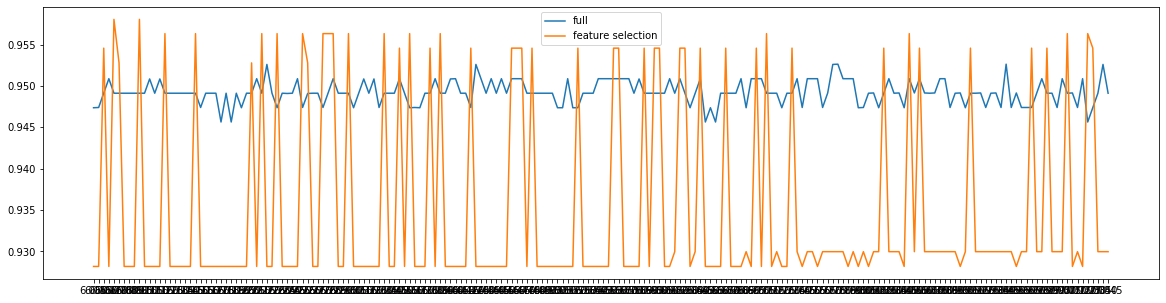

In [32]:
fullx=[]
fsx=[]

C=np.arange(6.05,7.05,0.005)
for i in C:
    LR_=LR(solver='liblinear',C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    X_embedded=SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())

print(max(fsx),C[fsx.index(max(fsx))])#最高分及其对应的索引值对应的C

plt.figure(figsize=(20,5))
plt.plot(C,fullx,label='full')
plt.plot(C,fsx,label='feature selection')
plt.xticks(C)
plt.legend()
plt.show()

In [33]:
LR_=LR(solver='liblinear',C=6.069999999999999,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9491152450090743

In [34]:
LR_=LR(solver='liblinear',C=6.069999999999999,random_state=420)
X_embedded=SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9580405755768732

In [35]:
X_embedded.shape

(569, 11)

# 梯度下降：max_iter

In [5]:
l2=[]
l2test=[]
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.arange(1,201,10):
    lrl2=LR(penalty='l2',solver='liblinear',C=0.8,max_iter=i)    
    lrl2=lrl2.fit(Xtrain,Ytrain)
   
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))


D:\Anoconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anoconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anoconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


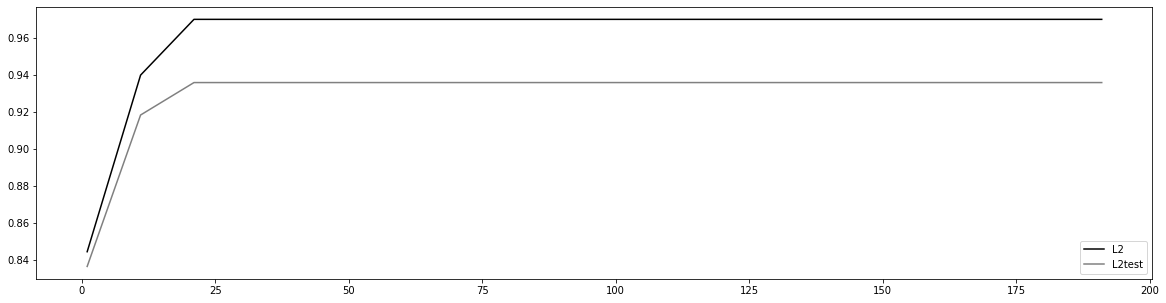

In [6]:
graph=[l2,l2test]#Y值
color=['black','gray']
label=['L2','L2test']
    
plt.figure(figsize=(20,5))   
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)#图例的位置在哪里，4表示右下角
plt.show()

In [9]:
lr=LR(penalty='l2',solver='liblinear',C=0.8,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_

array([24], dtype=int32)

## 二元回归和多元回归：solver&multi_class

In [13]:
from sklearn.datasets import load_iris
iris=load_iris()

for multi_class in('multinomial','ovr'):
    lr=LR(solver='sag',max_iter=100,random_state=42,multi_class=multi_class).fit(iris.data,iris.target)
    print("training score: %.3f(%s)"%(lr.score(iris.data,iris.target),multi_class))

training score: 0.987(multinomial)
training score: 0.960(ovr)


D:\Anoconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anoconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# 略

#  评分卡制作

# 3.1 导库，获取数据

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

data=pd.read_csv(r'cs-training.csv',index_col=0)

#  3.2 探索数据与数据预处理

In [2]:
data.head()#观察数据类型

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
data.shape


(150000, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


## 3.2.1去除重复值

In [5]:
#去除重复值
data.drop_duplicates(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [6]:
data.shape[0]

149391

In [7]:
#删除后不要忘记恢复索引
data.index=range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


## 3.2.2填补缺失值

In [8]:
#探索缺失值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [9]:
data.isnull().sum()#每一个列中是空值的数目

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [10]:
data.isnull().sum()/data.shape[0]#空值所占比例，
#MonthlyIncome缺失比例太高，很重要，不能删除，需要填补，NumberOfDependents缺失比例少，可删除


SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [11]:
data.isnull().mean()#与上式一样

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [12]:
#填补
data['NumberOfDependents'].fillna(data['NumberOfDependents'].mean(),inplace=True)#均值填补
#如果你选择删除缺失的2.5%的特征，要记得恢复索引

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


### 收入缺失可根据业务判断，应与工作人员沟通
### 在这里，我们使用随机森林填补“收入”

In [14]:
#构建填补函数
"""
参数：X--要填补的特征矩阵‘
     y--完整的没有缺失的标签
     to_fill:字符串，要填补的那一列的名称
"""

def fill_missing_rf(X,y,to_fill):
    df=X.copy()
    fill=df.loc[:,to_fill]#提取需要填补的那一列
    df=pd.concat([df.loc[:,df.columns!=to_fill],pd.DataFrame(y)],axis=1)#除去填补的一列，把剩下的拼接起来
    
    
#找出我们的训练集和测试集
    Ytrain=fill[fill.notnull()]#要填补的那一列的非空部分
    Ytest=fill[fill.isnull()]#要填补的那一列的空部分
    Xtrain=df.iloc[Ytrain.index,:]
    Xtest=df.iloc[Ytest.index,:]


#用随机森林来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr=rfr(n_estimators=100).fit(Xtrain,Ytrain)#100棵树
    Ypredict=rfr.predict(Xtest)#预测值

    return Ypredict

In [15]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [16]:
X=data.iloc[:,1:]#从第一列开始往后
y=data['SeriousDlqin2yrs']

In [17]:
X.shape

(149391, 10)

In [18]:
y_pred=fill_missing_rf(X,y,"MonthlyIncome")

In [19]:
y_pred.shape

(29221,)

In [20]:
#确认结果合理之后，就可以将数据覆盖了
data.loc[data.loc[:,'MonthlyIncome'].isnull(),'MonthlyIncome']=y_pred

In [21]:
data.loc[:,'MonthlyIncome'].isnull()#缺失值

0         False
1         False
2         False
3         False
4         False
          ...  
149386    False
149387    False
149388    False
149389    False
149390    False
Name: MonthlyIncome, Length: 149391, dtype: bool

In [22]:
data.loc[data.loc[:,'MonthlyIncome'].isnull(),'MonthlyIncome'].shape

(0,)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           149391 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [24]:
# 描述性统计
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T


,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5427.751606,13235.726133,0.0,0.0,0.190000,1800.000000,4424.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [25]:
#异常值也被我们观察到，年龄的最小值居然有零，这不符合银行的业务需求，即便是儿童账户也要至少8岁，我们可以查看一下年龄为0的人有多少
(data['age']==0).sum()

1

In [26]:
#可以判断是录入失误造成的，当作缺失值处理，直接删除该样本
data=data[data['age']!=0]

In [27]:
data.shape

(149390, 11)

In [28]:
#NumberOfTime30-59DaysPastDueNotWorse出现最大值为98，异常值
data[data.loc[:,'NumberOfTimes90DaysLate']>90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [29]:
data[data.loc[:,'NumberOfTimes90DaysLate']>90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.000000
2285,0,1.0,22,98,0.0,1267.080294,0,98,0,98,0.000000
3883,0,1.0,38,98,12.0,2233.600000,0,98,0,98,0.000000
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.000000
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,2271.296667,0,98,0,98,0.759863
147180,1,1.0,68,98,255.0,49.210000,0,98,0,98,0.000000
148548,1,1.0,24,98,54.0,1067.420000,0,98,0,98,0.000000
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.000000


In [30]:
data.loc[:,'NumberOfTimes90DaysLate'].value_counts()

0     141107
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [31]:
#删除违约次数大于90天的数据
data=data[data.loc[:,'NumberOfTimes90DaysLate']<90]

In [32]:
#恢复索引
data.index=range(data.shape[0])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
SeriousDlqin2yrs                        149165 non-null int64
RevolvingUtilizationOfUnsecuredLines    149165 non-null float64
age                                     149165 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149165 non-null int64
DebtRatio                               149165 non-null float64
MonthlyIncome                           149165 non-null float64
NumberOfOpenCreditLinesAndLoans         149165 non-null int64
NumberOfTimes90DaysLate                 149165 non-null int64
NumberRealEstateLoansOrLines            149165 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149165 non-null int64
NumberOfDependents                      149165 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [34]:
data.shape

(149165, 11)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
SeriousDlqin2yrs                        149165 non-null int64
RevolvingUtilizationOfUnsecuredLines    149165 non-null float64
age                                     149165 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149165 non-null int64
DebtRatio                               149165 non-null float64
MonthlyIncome                           149165 non-null float64
NumberOfOpenCreditLinesAndLoans         149165 non-null int64
NumberOfTimes90DaysLate                 149165 non-null int64
NumberRealEstateLoansOrLines            149165 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149165 non-null int64
NumberOfDependents                      149165 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


# 3.2.4 为什么不统一量纲，也不标准化数据分布？
#### 因为是业务要求

#  样本不均衡

In [36]:
#
X=data.iloc[:,1:]
y=data.iloc[:,0]


In [37]:
y.value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [38]:
n_sample=X.shape[0]

n_1_sample=y.value_counts()[1]#索引1的样本数
n_0_sample=y.value_counts()[0]

print('样本个数：{};1占{:.2%};0占{:.2%}'.format(n_sample,n_1_sample/n_sample,n_0_sample/n_sample))

样本个数：149165;1占6.62%;0占93.38%


In [39]:
#之前提到过，逻辑回归使用最多的是上采样方法来平衡样本
import imblearn
# imblearn是专门用来处理不平衡数据集的库，处理样本不均衡问题中性能高过sklearn很多
#  imblearn里面也是一个个的类，也需要进行实例化，fit拟合，和sklearn相似

In [40]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=42)#实例化
X,y=sm.fit_sample(X,y)#返回上采样完毕后的特征和标签

n_sample_=X.shape[0]

n_1_sample=y.value_counts()[1]#索引1的样本数
n_0_sample=y.value_counts()[0]

print('样本个数：{};1占{:.2%};0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

样本个数：278584;1占50.00%;0占50.00%


In [41]:
X.shape

(278584, 10)

In [42]:
pd.Series(y).value_counts()

1    139292
0    139292
Name: SeriousDlqin2yrs, dtype: int64

In [43]:
y.value_counts()

1    139292
0    139292
Name: SeriousDlqin2yrs, dtype: int64

# 3.2.6 分训练集和测试集

In [44]:
from sklearn.model_selection import train_test_split
X=pd.DataFrame(X)
y=pd.DataFrame(y)

X_train,X_vali,Y_train,Y_vali=train_test_split(X,y,test_size=0.3,random_state=420)

model_data=pd.concat([Y_train,X_train],axis=1)
model_data.index=range(model_data.shape[0])
model_data.columns=data.columns

model_data.to_csv(r'model_data.csv')

vali_data=pd.concat([Y_vali,X_vali],axis=1)
vali_data.index=range(vali_data.shape[0])
vali_data.columns=data.columns
vali_data.to_csv(r'vali_data.csv')

In [45]:
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.015404,53,0,0.121802,4728.00000,5,0,0,0,0.000000
1,0,0.168311,63,0,0.141964,1119.00000,5,0,0,0,0.000000
2,1,1.063570,39,1,0.417663,3500.00000,5,1,0,2,3.716057
3,0,0.088684,73,0,0.522822,5301.00000,11,0,2,0,0.000000
4,1,0.622999,53,0,0.423650,13000.00000,9,0,2,0,0.181999
...,...,...,...,...,...,...,...,...,...,...,...
195003,1,0.916269,32,2,0.548132,6000.00000,10,0,1,0,3.966830
195004,1,0.484728,50,1,0.370603,5258.00000,12,0,1,0,2.000000
195005,1,0.850447,46,0,0.562610,8000.00000,9,0,1,0,2.768793
195006,0,1.000000,64,0,0.364694,10309.00000,7,0,3,0,0.000000


In [46]:
model_data['age']=model_data['age'].astype('float')

In [47]:
model_data['age'].dtype

dtype('float64')

In [48]:
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [49]:
vali_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.000000,58,0,0.000481,2080.000000,4,0,0,0,0.000000
1,1,0.588870,44,0,0.198193,29373.217358,13,0,2,0,2.504880
2,0,0.057460,64,0,0.021830,6000.000000,4,0,0,0,0.000000
3,0,0.011585,52,0,0.139685,5583.000000,8,0,1,0,0.000000
4,1,0.663034,53,0,0.399663,4800.000000,12,0,0,0,0.201706
...,...,...,...,...,...,...,...,...,...,...,...
83571,1,1.177297,46,0,9.061839,1189.138498,1,0,0,0,0.097132
83572,1,0.865386,40,2,0.460507,3900.000000,11,0,0,0,4.592942
83573,1,0.876731,41,0,0.115744,6116.265023,3,0,0,0,2.132511
83574,1,0.966116,41,1,0.113281,3800.000000,3,3,0,0,3.000000


# 3.3 分箱

## 3.3.1 等频分箱


In [50]:
model_data['age']

0         53.0
1         63.0
2         39.0
3         73.0
4         53.0
          ... 
195003    32.0
195004    50.0
195005    46.0
195006    64.0
195007    53.0
Name: age, Length: 195008, dtype: float64

In [51]:
# 按照等频对需要分箱的列进行分箱
model_data['qcut'],updown=pd.qcut(model_data['age'],retbins=True,q=20)
"""
pd.qcut,基于分位数的分箱函数，本质是将连续型变量离散化
只能处理一维数据，返回箱子的上限和下限
参数q:要分箱的个数
参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的Series
现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限


注：dataframe['列名']#当这个列存在的时候，就是索引
当这个列不存在的时候，DataFrame会自动生成叫做这个列名的一个新的列
"""

#model_data['qcut']：在这里是让model_data新添加一列叫做“分箱”，这一列其实就是每个样本所对应的箱子
#updown：所有箱子的上限和下限


"\npd.qcut,基于分位数的分箱函数，本质是将连续型变量离散化\n只能处理一维数据，返回箱子的上限和下限\n参数q:要分箱的个数\n参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的Series\n现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限\n\n\n注：dataframe['列名']#当这个列存在的时候，就是索引\n当这个列不存在的时候，DataFrame会自动生成叫做这个列名的一个新的列\n"

In [52]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.015404,53.0,0,0.121802,4728.0,5,0,0,0,0.000000,"(52.0, 54.0]"
1,0,0.168311,63.0,0,0.141964,1119.0,5,0,0,0,0.000000,"(61.0, 64.0]"
2,1,1.063570,39.0,1,0.417663,3500.0,5,1,0,2,3.716057,"(36.0, 39.0]"
3,0,0.088684,73.0,0,0.522822,5301.0,11,0,2,0,0.000000,"(68.0, 74.0]"
4,1,0.622999,53.0,0,0.423650,13000.0,9,0,2,0,0.181999,"(52.0, 54.0]"


In [53]:
model_data['qcut']
#在这里是让model_data新添加一列叫做“分箱”，这一列其实就是每个样本所对应的箱子
#updown：所有箱子的上限和下限

0         (52.0, 54.0]
1         (61.0, 64.0]
2         (36.0, 39.0]
3         (68.0, 74.0]
4         (52.0, 54.0]
              ...     
195003    (31.0, 34.0]
195004    (48.0, 50.0]
195005    (45.0, 46.0]
195006    (61.0, 64.0]
195007    (52.0, 54.0]
Name: qcut, Length: 195008, dtype: category
Categories (20, interval[float64]): [(20.999, 28.0] < (28.0, 31.0] < (31.0, 34.0] < (34.0, 36.0] ... (61.0, 64.0] < (64.0, 68.0] < (68.0, 74.0] < (74.0, 107.0]]

In [54]:
model_data['qcut'].value_counts()

(36.0, 39.0]      12692
(20.999, 28.0]    11752
(58.0, 61.0]      11380
(48.0, 50.0]      11085
(46.0, 48.0]      10966
(31.0, 34.0]      10816
(50.0, 52.0]      10548
(43.0, 45.0]      10351
(61.0, 64.0]      10177
(39.0, 41.0]       9809
(52.0, 54.0]       9711
(41.0, 43.0]       9691
(28.0, 31.0]       9530
(74.0, 107.0]      9138
(64.0, 68.0]       8909
(54.0, 56.0]       8700
(68.0, 74.0]       8658
(56.0, 58.0]       7898
(34.0, 36.0]       7516
(45.0, 46.0]       5681
Name: qcut, dtype: int64

In [55]:
updown#所有箱子的上限和下限

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [56]:
updown[1:]

array([ 28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,  50.,
        52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [57]:
updown.shape

(21,)

In [58]:
#统计每个分段0，1的数量
#这里使用了数据透视表的功能groupby
coount_y0=model_data[model_data['SeriousDlqin2yrs']==0].groupby(by='qcut').count()['SeriousDlqin2yrs']
coount_y1=model_data[model_data['SeriousDlqin2yrs']==1].groupby(by='qcut').count()['SeriousDlqin2yrs']



In [59]:
model_data[model_data['SeriousDlqin2yrs']==0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.015404,53.0,0,0.121802,4728.00,5,0,0,0,0.0,"(52.0, 54.0]"
1,0,0.168311,63.0,0,0.141964,1119.00,5,0,0,0,0.0,"(61.0, 64.0]"
3,0,0.088684,73.0,0,0.522822,5301.00,11,0,2,0,0.0,"(68.0, 74.0]"
5,0,0.364157,42.0,0,0.228036,23333.00,10,0,1,0,2.0,"(41.0, 43.0]"
7,0,1.000000,26.0,0,25.000000,0.61,0,0,0,0,0.0,"(20.999, 28.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
194996,0,0.938866,48.0,0,0.611371,3200.00,9,0,1,1,1.0,"(46.0, 48.0]"
194997,0,0.000000,79.0,0,0.734151,4400.00,6,0,1,0,0.0,"(74.0, 107.0]"
194999,0,0.001234,78.0,0,0.000476,10500.00,13,0,0,0,0.0,"(74.0, 107.0]"
195002,0,0.227820,77.0,0,0.554916,6600.00,24,0,2,0,0.0,"(74.0, 107.0]"


In [60]:
model_data[model_data['SeriousDlqin2yrs']==0].groupby(by='qcut').count()#以qcut聚类，统计每个箱中值为0的数量

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
qcut,,,,,,,,,,,
"(20.999, 28.0]",4243,4243,4243,4243,4243,4243,4243,4243,4243,4243,4243
"(28.0, 31.0]",3571,3571,3571,3571,3571,3571,3571,3571,3571,3571,3571
"(31.0, 34.0]",4075,4075,4075,4075,4075,4075,4075,4075,4075,4075,4075
"(34.0, 36.0]",2908,2908,2908,2908,2908,2908,2908,2908,2908,2908,2908
"(36.0, 39.0]",5182,5182,5182,5182,5182,5182,5182,5182,5182,5182,5182
"(39.0, 41.0]",3956,3956,3956,3956,3956,3956,3956,3956,3956,3956,3956
"(41.0, 43.0]",4002,4002,4002,4002,4002,4002,4002,4002,4002,4002,4002
"(43.0, 45.0]",4389,4389,4389,4389,4389,4389,4389,4389,4389,4389,4389
"(45.0, 46.0]",2419,2419,2419,2419,2419,2419,2419,2419,2419,2419,2419


In [61]:
model_data[model_data['SeriousDlqin2yrs']==0].groupby(by='qcut').count()['SeriousDlqin2yrs']

qcut
(20.999, 28.0]    4243
(28.0, 31.0]      3571
(31.0, 34.0]      4075
(34.0, 36.0]      2908
(36.0, 39.0]      5182
(39.0, 41.0]      3956
(41.0, 43.0]      4002
(43.0, 45.0]      4389
(45.0, 46.0]      2419
(46.0, 48.0]      4813
(48.0, 50.0]      4900
(50.0, 52.0]      4728
(52.0, 54.0]      4681
(54.0, 56.0]      4677
(56.0, 58.0]      4483
(58.0, 61.0]      6583
(61.0, 64.0]      6968
(64.0, 68.0]      6623
(68.0, 74.0]      6753
(74.0, 107.0]     7737
Name: SeriousDlqin2yrs, dtype: int64

In [62]:
coount_y1

qcut
(20.999, 28.0]    7509
(28.0, 31.0]      5959
(31.0, 34.0]      6741
(34.0, 36.0]      4608
(36.0, 39.0]      7510
(39.0, 41.0]      5853
(41.0, 43.0]      5689
(43.0, 45.0]      5962
(45.0, 46.0]      3262
(46.0, 48.0]      6153
(48.0, 50.0]      6185
(50.0, 52.0]      5820
(52.0, 54.0]      5030
(54.0, 56.0]      4023
(56.0, 58.0]      3415
(58.0, 61.0]      4797
(61.0, 64.0]      3209
(64.0, 68.0]      2286
(68.0, 74.0]      1905
(74.0, 107.0]     1401
Name: SeriousDlqin2yrs, dtype: int64

In [63]:
#num_bins值分别为每个区间的上界，下界，0出现的次数，1出现的次数
num_bins=[*zip(updown,updown[1:],coount_y0,coount_y1)]
#注意zip会按照最短的那一个列表来进行结合
num_bins  

[(21.0, 28.0, 4243, 7509),
 (28.0, 31.0, 3571, 5959),
 (31.0, 34.0, 4075, 6741),
 (34.0, 36.0, 2908, 4608),
 (36.0, 39.0, 5182, 7510),
 (39.0, 41.0, 3956, 5853),
 (41.0, 43.0, 4002, 5689),
 (43.0, 45.0, 4389, 5962),
 (45.0, 46.0, 2419, 3262),
 (46.0, 48.0, 4813, 6153),
 (48.0, 50.0, 4900, 6185),
 (50.0, 52.0, 4728, 5820),
 (52.0, 54.0, 4681, 5030),
 (54.0, 56.0, 4677, 4023),
 (56.0, 58.0, 4483, 3415),
 (58.0, 61.0, 6583, 4797),
 (61.0, 64.0, 6968, 3209),
 (64.0, 68.0, 6623, 2286),
 (68.0, 74.0, 6753, 1905),
 (74.0, 107.0, 7737, 1401)]

In [64]:
# zip的用法
[*zip([1,2,3],['a','b','c'])]#元祖

[(1, 'a'), (2, 'b'), (3, 'c')]

In [65]:
[*zip([1,2,3],['a','b','c','d'])]

[(1, 'a'), (2, 'b'), (3, 'c')]

In [66]:
[*zip(updown,updown[1:])]

[(21.0, 28.0),
 (28.0, 31.0),
 (31.0, 34.0),
 (34.0, 36.0),
 (36.0, 39.0),
 (39.0, 41.0),
 (41.0, 43.0),
 (43.0, 45.0),
 (45.0, 46.0),
 (46.0, 48.0),
 (48.0, 50.0),
 (50.0, 52.0),
 (52.0, 54.0),
 (54.0, 56.0),
 (56.0, 58.0),
 (58.0, 61.0),
 (61.0, 64.0),
 (64.0, 68.0),
 (68.0, 74.0),
 (74.0, 107.0)]

##  3.3.2确保每个箱中都有0和1


In [67]:
for i in range(20):
    if 0 in num_bins[0][2:]:
        num_bins[0:2]=[(
            num_bins[0][0],
            num_bins[1][1],
            num_bins[0][2]+num_bins[1][2],
            num_bins[0][2]+num_bins[1][3] )]
        continue
    
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1:i+1]=[(
                num_bins[i-1][0],
                num_bins[i][1],
                num_bins[i-1][2]+num_bins[i][2],
                num_bins[i-1][3]+num_bins[i][3]        
        )]
        break
    else:
        break
            
        

## 3.3.3 定义WOE和IV函数


In [68]:
# 定义WOE和BAD RATE
# BAD RATE和bad%不是一个东西
# BAD RATE是一个箱中，坏的样本所占的比例(bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例

def get_woe(num_bins):
    #通过 num_bins数据计算woe
    columns=['min','max','count_0','count_1']
    df=pd.DataFrame(num_bins,columns=columns)
    df['total']=df.count_0+df.count_1#一个箱子中的所有样本数
    df['percentage']=df.total/df.total.sum()
    df['bad_rate']=df.count_1/df.total
    df['good%']=df.count_0/df.count_0.sum()
    df['bad%']=df.count_1/df.count_1.sum()
    df['woe']=np.log(df['good%']/df['bad%'])
    return df

#计算IV值
def get_iv(bins_df):
    rate=bins_df['good%']-bins_df['bad%']
    iv=np.sum(rate*bins_df.woe)
    return iv


In [69]:
df=get_woe(num_bins)

In [70]:
df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4243,7509,11752,0.060264,0.638955,0.043433,0.077160,-0.574667
1,28.0,31.0,3571,5959,9530,0.048870,0.625289,0.036554,0.061233,-0.515893
2,31.0,34.0,4075,6741,10816,0.055464,0.623243,0.041713,0.069268,-0.507173
3,34.0,36.0,2908,4608,7516,0.038542,0.613092,0.029767,0.047350,-0.464164
4,36.0,39.0,5182,7510,12692,0.065085,0.591711,0.053045,0.077170,-0.374880
5,39.0,41.0,3956,5853,9809,0.050301,0.596697,0.040495,0.060144,-0.395557
6,41.0,43.0,4002,5689,9691,0.049695,0.587040,0.040966,0.058458,-0.355576
7,43.0,45.0,4389,5962,10351,0.053080,0.575983,0.044927,0.061264,-0.310140
8,45.0,46.0,2419,3262,5681,0.029132,0.574195,0.024762,0.033519,-0.302822
9,46.0,48.0,4813,6153,10966,0.056234,0.561098,0.049268,0.063226,-0.249455


In [71]:
iv_age=get_iv(df)

In [72]:
iv_age

0.3534260046441345

###  卡方检验,合并箱子

In [73]:
num_bins_=num_bins.copy()
import matplotlib.pyplot as plt
import scipy

In [74]:
x1=num_bins_[0][2:]
x1

(4243, 7509)

In [75]:
x2=num_bins_[1][2:]
x2

(3571, 5959)

In [76]:
scipy.stats.chi2_contingency([x1,x2])[1]

0.04110848432696819

In [77]:
scipy.stats.chi2_contingency([x1,x2])[0]

4.171537291044168

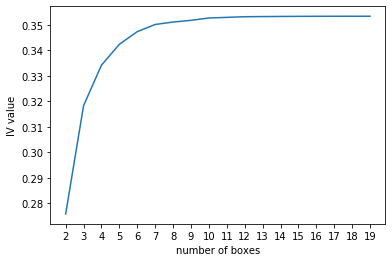

In [78]:

IV=[]
axisx=[]
while len(num_bins_)>2:
    pvs=[]
    #获取num_bins_两两之间的卡方检验的置信度（或卡方值）
    for i in range(len(num_bins_)-1):
        x1=num_bins_[i][2:]#第i组后面两个数
        x2=num_bins_[i+1][2:]#第i+1组后面两个数
        #0返回chi2值，1返回p值
        pv=scipy.stats.chi2_contingency([x1,x2])[1]#pv-p value
        #chi2=scipy.stats.chi2_contingency([x1,x2])[0]
        pvs.append(pv)
        
    #通过p值进行处理，合并P值最大的两组
    i=pvs.index(max(pvs))
    num_bins_[i:i+2]=[(
        num_bins_[i][0],
        num_bins_[i+1][1],
        num_bins_[i][2]+num_bins_[i+1][2],
        num_bins_[i][3]+num_bins_[i+1][3]   
    )]
    bins_df_=get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df_))
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel('number of boxes')
plt.ylabel('IV value')
plt.show()

## 3.3.5用最佳分箱个数分箱，并验证分箱结果

In [79]:
def get_bins(num_bins_,n):
    while len(num_bins_)>n:
        pvs=[]
        for i in range(len(num_bins_)-1):
            x1=num_bins_[i][2:]
            x2=num_bins_[i+1][2:]
            pv=scipy.stats.chi2_contingency([x1,x2])[1]
            #chi2=scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)
            
        i=pvs.index(max(pvs))
        num_bins_[i:i+2]=[(
        num_bins_[i][0],
        num_bins_[i+1][1],
        num_bins_[i][2]+num_bins_[i+1][2],
        num_bins_[i][3]+num_bins_[i+1][3]   
    )]
    
    return num_bins_
        

In [80]:
afterbins=get_bins(num_bins,6)

In [81]:
afterbins

[(21.0, 36.0, 14797, 24817),
 (36.0, 54.0, 39070, 51464),
 (54.0, 61.0, 15743, 12235),
 (61.0, 64.0, 6968, 3209),
 (64.0, 74.0, 13376, 4191),
 (74.0, 107.0, 7737, 1401)]

In [82]:
bins_df_=get_woe(num_bins)

In [83]:
bins_df_

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14797,24817,39614,0.203140,0.626470,0.151467,0.255012,-0.520940
1,36.0,54.0,39070,51464,90534,0.464258,0.568449,0.399934,0.528828,-0.279363
2,54.0,61.0,15743,12235,27978,0.143471,0.437308,0.161151,0.125723,0.248259
3,61.0,64.0,6968,3209,10177,0.052188,0.315319,0.071327,0.032975,0.771533
4,64.0,74.0,13376,4191,17567,0.090083,0.238572,0.136922,0.043065,1.156687
5,74.0,107.0,7737,1401,9138,0.046860,0.153316,0.079199,0.014396,1.704992


## 3.3.6 将选取最佳分箱个数的过程包装为函数

In [84]:
def graphforbestbin(DF,X,Y,n=6,q=20,graph=True):
    """
    自动最优分箱函数，基于卡方检验的分箱
    参数：
    DF:需要输入的数据
    X：需要分箱的列名
    Y:分箱数据对应的标签Y列名
    n:保留分箱个数
    q:初始分箱个数
    graph:是否要画出IV图像
    """
    DF=DF[[X,Y]].copy()
    
    DF['qcut'],bins=pd.qcut(DF[X],retbins=True,q=q,duplicates='drop')
    coount_y0=DF.loc[DF[Y]==0].groupby(by='qcut').count()[Y]
    coount_y1=DF.loc[DF[Y]==1].groupby(by='qcut').count()[Y]
    num_bins=[*zip(bins,bins[1:],coount_y0,coount_y1)]
    
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2]=[(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][2]+num_bins[1][3] )]
        continue
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1:i+1]=[(
                num_bins[i-1][0],
                num_bins[i][1],
                num_bins[i-1][2]+num_bins[i][2],
                num_bins[i-1][3]+num_bins[i][3]        
        )]
            break
        else:
            break
    
    def get_woe(num_bins):
        #通过 num_bins数据计算woe
        columns=['min','max','count_0','count_1']
        df=pd.DataFrame(num_bins,columns=columns)
        df['total']=df.count_0+df.count_1#一个箱子中的所有样本数
        df['percentage']=df.total/df.total.sum()
        df['bad_rate']=df.count_1/df.total
        df['good%']=df.count_0/df.count_0.sum()
        df['bad%']=df.count_1/df.count_1.sum()
        df['woe']=np.log(df['good%']/df['bad%'])
        return df

  #计算IV值
    def get_iv(df):
        rate=df['good%']-df['bad%']
        iv=np.sum(rate*df.woe)
        return iv
    
    IV=[]
    axisx=[]
    while len(num_bins)>n:
        pvs=[]
    #获取num_bins_两两之间的卡方检验的置信度（或卡方值）
        for i in range(len(num_bins)-1):
            x1=num_bins[i][2:]#第i组后面两个数
            x2=num_bins[i+1][2:]#第i+1组后面两个数
        #0返回chi2值，1返回p值
            pv=scipy.stats.chi2_contingency([x1,x2])[1]#pv-p value
        #chi2=scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)
        
    #通过p值进行处理，合并P值最大的两组
        i=pvs.index(max(pvs))
        num_bins[i:i+2]=[(
            num_bins[i][0],
            num_bins[i+1][1],
            num_bins[i][2]+num_bins[i+1][2],
            num_bins[i][3]+num_bins[i+1][3])]
        
        bins_df=pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
    
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel('number of boxes')
        plt.ylabel('IV value')
        plt.show()
        
    return bins_df
        
    


In [85]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


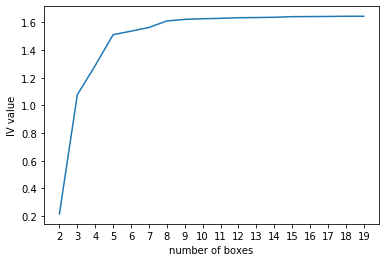

age


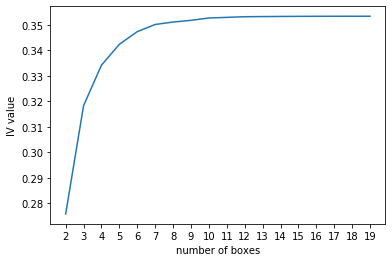

NumberOfTime30-59DaysPastDueNotWorse


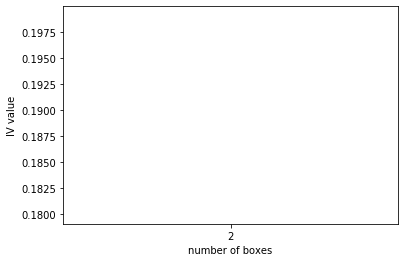

DebtRatio


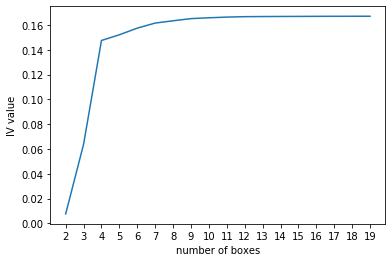

MonthlyIncome


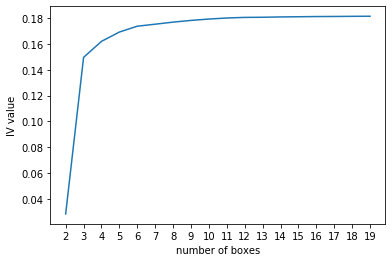

NumberOfOpenCreditLinesAndLoans


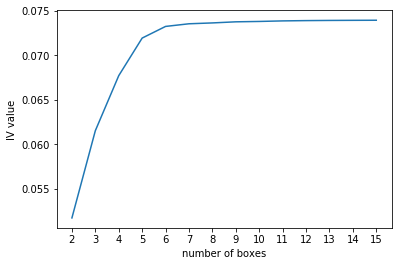

NumberOfTimes90DaysLate


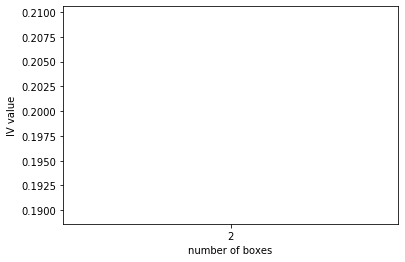

NumberRealEstateLoansOrLines


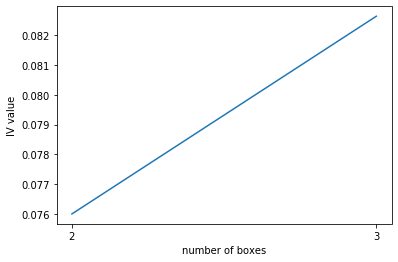

NumberOfTime60-89DaysPastDueNotWorse


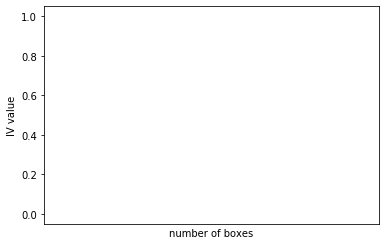

UnboundLocalError: local variable 'bins_df' referenced before assignment

In [86]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,'SeriousDlqin2yrs',n=2,q=20,graph=True)

In [87]:
# 手动分箱

auto_col_bins={
    'RevolvingUtilizationOfUnsecuredLines':6,
    'age':5,
    'DebtRatio':4,
    'MonthlyIncome':3,
    'NumberOfOpenCreditLinesAndLoans':5
}
#不能使用自动分箱的变量
hand_bins={
    'NumberOfTime30-59DaysPastDueNotWorse':[0,1,2,13],
    'NumberOfTimes90DaysLate':[0,1,2,17],
    'NumberRealEstateLoansOrLines':[0,1,2,4,54],
    'NumberOfTime60-89DaysPastDueNotWorse':[0,1,2,8],
    'NumberOfDependents':[0,1,2,3]}

# 保证区间覆盖使用np.inf替换最大值，用-np.inf替换最小值
hand_bins={k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [88]:
hand_bins

{'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [89]:
auto_col_bins

{'RevolvingUtilizationOfUnsecuredLines': 6,
 'age': 5,
 'DebtRatio': 4,
 'MonthlyIncome': 3,
 'NumberOfOpenCreditLinesAndLoans': 5}

In [90]:
bins_of_col={}
#生成自动分箱的的分箱区间和分箱后的IV值

for col in auto_col_bins:
    bins_df=graphforbestbin(model_data,col,'SeriousDlqin2yrs',n=auto_col_bins[col],q=20,graph=False)
    bins_list=sorted(set(bins_df['min']).union(bins_df['max']))
    print(bins_list)
    bins_list[0],bins_list[-1]=-np.inf,np.inf
    bins_of_col[col]=bins_list
    
#合并手动分箱数据
bins_of_col.update(hand_bins)

[0.0, 0.098999107, 0.29760036556327857, 0.4647157395, 0.9827022452644255, 0.9999998999999999, 18300.0]
[21.0, 36.0, 54.0, 61.0, 74.0, 107.0]
[0.0, 0.017386295179213113, 0.4016965259001521, 1.473081988718592, 329664.0]
[0.0, 0.11, 5600.0, 3008750.0]
[0.0, 1.0, 3.0, 5.0, 17.0, 57.0]


In [91]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.098999107,
  0.29760036556327857,
  0.4647157395,
  0.9827022452644255,
  0.9999998999999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf,
  0.017386295179213113,
  0.4016965259001521,
  1.473081988718592,
  inf],
 'MonthlyIncome': [-inf, 0.11, 5600.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [92]:
bins_df=graphforbestbin(model_data,'age','SeriousDlqin2yrs',n=5,q=20,graph=False)

In [93]:
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14797,24817,39614,0.203140,0.626470,0.151467,0.255012,-0.520940
1,36.0,54.0,39070,51464,90534,0.464258,0.568449,0.399934,0.528828,-0.279363
2,54.0,61.0,15743,12235,27978,0.143471,0.437308,0.161151,0.125723,0.248259
3,61.0,74.0,20344,7400,27744,0.142271,0.266724,0.208248,0.076040,1.007470
4,74.0,107.0,7737,1401,9138,0.046860,0.153316,0.079199,0.014396,1.704992


##  3.4 计算各箱的WOE并映射到数据中

In [94]:
# 现在已经有了箱子，接下来要计算各箱的WOE，并且把WOE替换到原来的model_data中，因为将使用WOE覆盖后的数据建模
data=model_data.copy()


data=data[['age','SeriousDlqin2yrs']].copy()

data['cut']=pd.cut(data['age'],[-np.inf, 36.0, 54.0, 61.0, 74.0, np.inf])
data

,age,SeriousDlqin2yrs,cut
0,53.0,0,"(36.0, 54.0]"
1,63.0,0,"(61.0, 74.0]"
2,39.0,1,"(36.0, 54.0]"
3,73.0,0,"(61.0, 74.0]"
4,53.0,1,"(36.0, 54.0]"
...,...,...,...
195003,32.0,1,"(-inf, 36.0]"
195004,50.0,1,"(36.0, 54.0]"
195005,46.0,1,"(36.0, 54.0]"
195006,64.0,0,"(61.0, 74.0]"


In [95]:
data.groupby('cut')['SeriousDlqin2yrs'].value_counts()#按分箱聚合

cut           SeriousDlqin2yrs
(-inf, 36.0]  1                   24817
              0                   14797
(36.0, 54.0]  1                   51464
              0                   39070
(54.0, 61.0]  0                   15743
              1                   12235
(61.0, 74.0]  0                   20344
              1                    7400
(74.0, inf]   0                    7737
              1                    1401
Name: SeriousDlqin2yrs, dtype: int64

In [96]:
# 使用unstack()来将树状结构变成表状结构
data.groupby('cut')['SeriousDlqin2yrs'].value_counts().unstack()

SeriousDlqin2yrs,0,1
cut,,
"(-inf, 36.0]",14797,24817
"(36.0, 54.0]",39070,51464
"(54.0, 61.0]",15743,12235
"(61.0, 74.0]",20344,7400
"(74.0, inf]",7737,1401


In [97]:
bins_df=data.groupby('cut')['SeriousDlqin2yrs'].value_counts().unstack()
bins_df['woe']=np.log(bins_df[0]/bins_df[0].sum()/(bins_df[1]/bins_df[1].sum()))

In [98]:
bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 36.0]",14797,24817,-0.520940
"(36.0, 54.0]",39070,51464,-0.279363
"(54.0, 61.0]",15743,12235,0.248259
"(61.0, 74.0]",20344,7400,1.007470
"(74.0, inf]",7737,1401,1.704992


In [99]:
# 封装函数
def get_woe(df,col,y,bins):
    df=df[[col,y]].copy()
    df['cut']=pd.cut(df[col],bins)
    bins_df=df.groupby('cut')[y].value_counts().unstack()
    woe=bins_df['woe']=np.log(bins_df[0]/bins_df[0].sum()/(bins_df[1]/bins_df[1].sum()))
    return woe

In [100]:
woeall={}
for col in bins_of_col:
    woeall[col]=get_woe(model_data,col,'SeriousDlqin2yrs',bins_of_col[col])

In [101]:
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.099]     2.199374
 (0.099, 0.298]    0.666679
 (0.298, 0.465]   -0.125930
 (0.465, 0.983]   -1.071662
 (0.983, 1.0]     -0.474941
 (1.0, inf]       -2.039594
 dtype: float64, 'age': cut
 (-inf, 36.0]   -0.520940
 (36.0, 54.0]   -0.279363
 (54.0, 61.0]    0.248259
 (61.0, 74.0]    1.007470
 (74.0, inf]     1.704992
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0174]     1.507780
 (0.0174, 0.402]    0.036761
 (0.402, 1.473]    -0.388390
 (1.473, inf]       0.174989
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.11]      1.485894
 (0.11, 5600.0]   -0.242206
 (5600.0, inf]     0.232423
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.841488
 (1.0, 3.0]    -0.336154
 (3.0, 5.0]    -0.054322
 (5.0, 17.0]    0.124254
 (17.0, inf]    0.467523
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.352592
 (0.0, 1.0]    -0.871376
 (1.0, 2.0]    -1.380844
 (2.0, inf]    -1.541517
 dtype: float64

In [102]:
# 接下来把所有WOE映射到原始数据中
#不希望覆盖掉原有的数据，创建一个新的DataFrame,索引和原始数据model_data一模一样
model_woe=pd.DataFrame(index=model_data.index)

#将原始数据分箱后，按箱的结果把woe结构用map函数映射到数据中
model_woe['age']=pd.cut(model_data['age'],bins_of_col['age']).map(woeall['age'])

In [103]:
model_woe.head()

,age
0,-0.279363
1,1.007470
2,-0.279363
3,1.007470
4,-0.279363


In [104]:
#对所有特征操作可以写成：
for col in bins_of_col:
    model_woe[col]=pd.cut(model_data[col],bins_of_col[col]).map(woeall[col])
    
#把标签补充到数据当中
model_woe['SeriousDlqin2yrs']=model_data['SeriousDlqin2yrs']


# 3.5 建模与模型验证


In [105]:
#处理测试集
vali_woe=pd.DataFrame(index=vali_data.index)
for col in bins_of_col:
    vali_woe[col]=pd.cut(vali_data[col],bins_of_col[col]).map(woeall[col])
vali_woe['SeriousDlqin2yrs']=vali_data['SeriousDlqin2yrs']


In [106]:
vali_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,2.199374,0.248259,1.507780,-0.242206,-0.054322,0.352592,0.233924,-0.393784,0.124511,0.658684,0
1,-1.071662,-0.279363,0.036761,0.232423,0.124254,0.352592,0.233924,0.617325,0.124511,-0.477005,1
2,2.199374,1.007470,0.036761,0.232423,-0.054322,0.352592,0.233924,-0.393784,0.124511,0.658684,0
3,2.199374,-0.279363,0.036761,-0.242206,0.124254,0.352592,0.233924,0.194687,0.124511,0.658684,0
4,-1.071662,-0.279363,0.036761,-0.242206,0.124254,0.352592,0.233924,-0.393784,0.124511,-0.513663,1


In [107]:
#接下来顺利建模
X=model_woe.iloc[:,:-1]
y=model_woe.iloc[:,-1]
vali_X=vali_woe.iloc[:,:-1]
vali_y=vali_woe.iloc[:,-1]

In [108]:
from sklearn.linear_model import LogisticRegression as LR

lr=LR().fit(X,y)
lr.score(vali_X,vali_y)#

0.7763951373600076

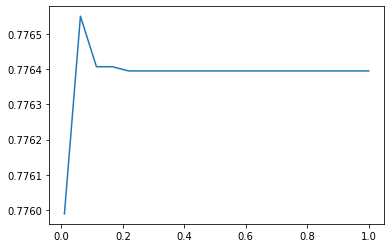

In [109]:
c_1=np.linspace(0.01,1,20)
c_2=np.linspace(0.01,0.2,20)

score=[]
for i in c_1:
    lr=LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
    
plt.figure()
plt.plot(c_1,score)
plt.show()

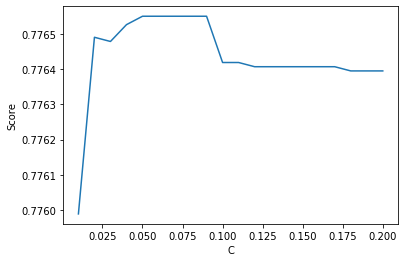

In [134]:
c_2=np.linspace(0.01,0.2,20)

score=[]
for i in c_2:
    lr=LR(solver='liblinear',C=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
    
plt.figure()
plt.plot(c_2,score)
plt.xlabel('C')
plt.ylabel('Score')
plt.show()

In [110]:
lr.n_iter_

array([5], dtype=int32)

D:\Anoconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anoconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anoconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anoconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anoconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


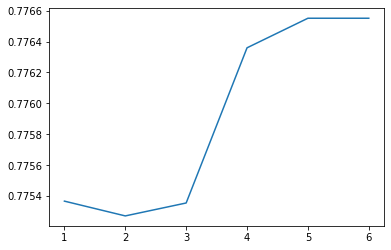

In [132]:
score=[]
for i in [1,2,3,4,5,6]:
    lr=LR(solver='liblinear',C=0.025,max_iter=i).fit(X,y)
    score.append(lr.score(vali_X,vali_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

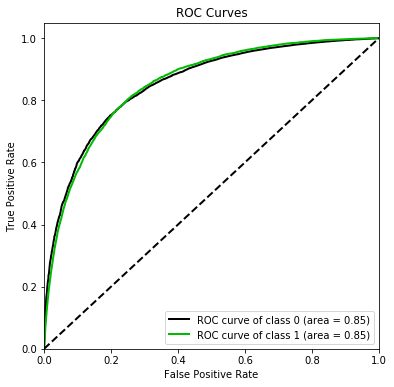

In [133]:
# ROC曲线
import scikitplot as skplt
vali_proba_df=pd.DataFrame(lr.predict_proba(vali_X))
skplt.metrics.plot_roc(vali_y,vali_proba_df,plot_micro=False,figsize=(6,6),plot_macro=False)

In [119]:
B=20/np.log(2)
A=600+B*np.log(1/60)

In [120]:
B,A

(28.85390081777927, 481.8621880878296)

In [121]:
base_score=A-B*lr.intercept_
base_score

array([481.97408625])

In [124]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.015404,53.0,0,0.121802,4728.0,5,0,0,0,0.000000,"(52.0, 54.0]"
1,0,0.168311,63.0,0,0.141964,1119.0,5,0,0,0,0.000000,"(61.0, 64.0]"
2,1,1.063570,39.0,1,0.417663,3500.0,5,1,0,2,3.716057,"(36.0, 39.0]"
3,0,0.088684,73.0,0,0.522822,5301.0,11,0,2,0,0.000000,"(68.0, 74.0]"
4,1,0.622999,53.0,0,0.423650,13000.0,9,0,2,0,0.181999,"(52.0, 54.0]"


In [125]:
score_age=woeall['age']*(-B*lr.coef_[0][1])
score_age

cut
(-inf, 36.0]   -11.320545
(36.0, 54.0]    -6.070842
(54.0, 61.0]     5.394922
(61.0, 74.0]    21.893326
(74.0, inf]     37.051162
dtype: float64

In [128]:
file='ScoreData.csv'

with open(file,'w') as fdata:
    fdata.write('base_score,{}\n'.format(base_score))
for  i,col in enumerate(X.columns):
    score=woeall[col]*(-B*lr.coef_[0][i])
    score.name='Score'
    score.index.name=col
    score.to_csv(file,header=True,mode='a')

In [126]:
[*enumerate(X.columns)]#里面是元祖

[(0, 'age'),
 (1, 'RevolvingUtilizationOfUnsecuredLines'),
 (2, 'DebtRatio'),
 (3, 'MonthlyIncome'),
 (4, 'NumberOfOpenCreditLinesAndLoans'),
 (5, 'NumberOfTime30-59DaysPastDueNotWorse'),
 (6, 'NumberOfTimes90DaysLate'),
 (7, 'NumberRealEstateLoansOrLines'),
 (8, 'NumberOfTime60-89DaysPastDueNotWorse'),
 (9, 'NumberOfDependents')]